## Implementation of Two-Class Logistic regression From Scratch and Comparing Performance with Scikit-Learn SGD-Regressor Package on Breast Cancer Wisconsin Data Set

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#### <u>Step 1</u>:

    1. Implement the sigmoid function from scratch and call it sigmoid_f
    2. Implement the hypothesis function from scratch and call it classifier_f
    3. Implement the entropy function as your cost function and call it binary_loss_f
    4. Implement gradient descent for logistic regression and call it gradient_f

In [2]:
class Logistic_Regression_manual():
    
    def __init__(self, learning_rate, number_of_iter):
        self.lr = learning_rate
        self.niter = number_of_iter
        
    def sigmoid_f(self):
        sigma = 1/(1+np.exp(-(self.x@self.w+self.b)))
        return sigma
        
    def binary_loss_f(self):
        h_theta = self.sigmoid_f()
        loss = (-1/self.m)*np.sum(((self.y*np.log(h_theta)) + (1-self.y)*(np.log(1-h_theta))))
        return loss
    
    def gradient_f(self,i):
        yhat = self.sigmoid_f()
        
        dldw = (1/self.m)*((self.x.T)@(yhat-self.y))
        dldb = (1/self.m)*np.sum(yhat-self.y)
        
        self.w = self.w - dldw*self.lr
        self.b = self.b - dldb*self.lr
        
        binaryloss = self.binary_loss_f()
        #print(f'Round {i} & Loss is {binaryloss}')
        return binaryloss      
        
    def model_fit(self, x, y):
        self.x = x
        self.y = y
        
        self.m, self.n = x.shape
        
        self.w = np.zeros(self.n)
        self.w = self.w.reshape(-1,1)
        self.b = 0
        self.loss_list = list() 
        
        for i in range(self.niter):
            l = self.gradient_f(i)
            self.loss_list.append(l)
        
        self.coeff_ = {'weights':self.w, 'bias':self.b}
        return self
            
    def classifier_f(self,xtest):
        y_predicted = 1/(1+np.exp(-((xtest@self.w) + self.b)))
        y_predicted = np.where(y_predicted>=0.5,1,0)
        return y_predicted

In [3]:
xt = np.random.randint(10, size=(2, 3))
yt = (np.random.randint(0,2,2)).transpose()
yt = yt.reshape(-1,1)

In [4]:
log_model = Logistic_Regression_manual(learning_rate=0.01,number_of_iter=500)
log_model.model_fit(xt,yt)

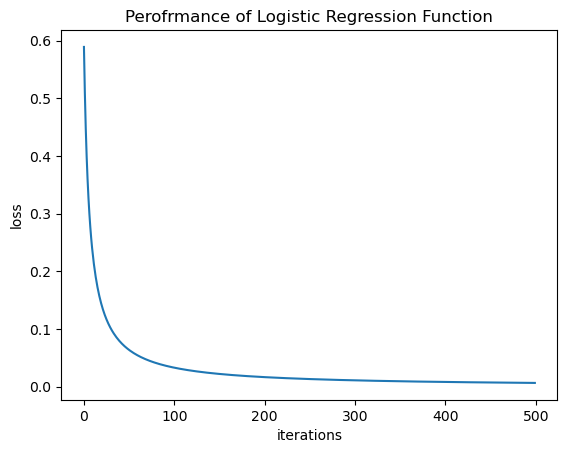

In [5]:
plt.plot(log_model.loss_list)
plt.xlabel("iterations")
plt.ylabel("loss")
plt.title('Perofrmance of Logistic Regression Function')
plt.show()

#### <u>Step2</u>: Implement the above algorithm with Breast Cancer Dataset and evaluate performance

In [6]:
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import MinMaxScaler

data = load_breast_cancer()
bc_df = pd.DataFrame(data.data, columns=data.feature_names)
bc_df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [7]:
X = bc_df.copy()
Y = data.target
Y = Y.reshape(-1,1)

In [8]:
minmx = MinMaxScaler()
minmx.fit(X)
X_scaled = minmx.transform(X)

#Note: as the target column in binary therefore we do not need to normalize/scaling on target column.

In [9]:
bc_logr_model = Logistic_Regression_manual(learning_rate=0.1,number_of_iter=10000)
bc_logr_model.model_fit(X_scaled,Y)

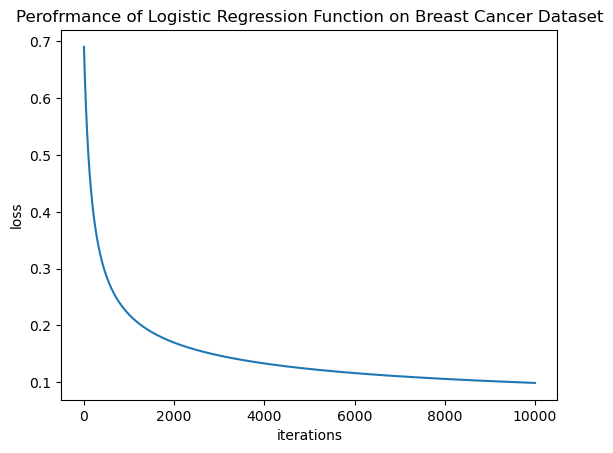

In [10]:
plt.plot(bc_logr_model.loss_list)
plt.xlabel("iterations")
plt.ylabel("loss")
plt.title("Perofrmance of Logistic Regression Function on Breast Cancer Dataset")
plt.show()

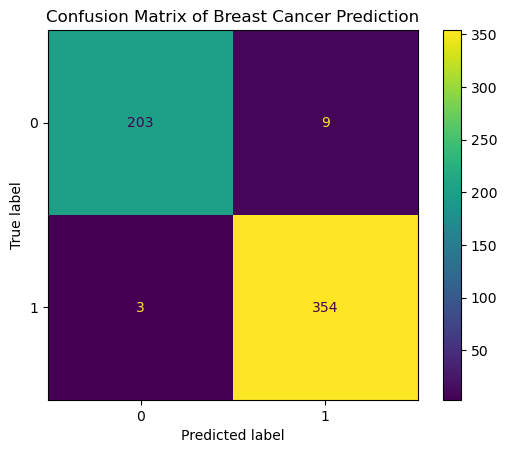

In [11]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay

#Predict the Class Labels of the train data set (as we do not have test data separately)
yhat = bc_logr_model.classifier_f(X_scaled)

cm = confusion_matrix(Y, yhat, labels= [0,1])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0,1])
disp.plot()
plt.title("Confusion Matrix of Breast Cancer Prediction")
plt.show()

**As we can see, our algorithm performs pretty well on the breast cancer data set with only 3 False Negatives out of total 357 Negative Cases. We are more emphaisizing on False Negative here as this is a medical dataset and we want more accurary in preicting cases and least false negative cases. More flase negatives can be deadly.**

In [12]:
#The updated Weights and Bias of the dataset are:
updated_weights = bc_logr_model.coeff_

param_dict = {}
for i in range(len(bc_df.columns)):
    param_dict[bc_df.columns[i]] = updated_weights['weights'][i][0]
    
sorted_param_dict = sorted(param_dict.items(), key=lambda x:x[1], reverse=True)
sorted_param_dict

[('mean fractal dimension', 2.6421348169417223),
 ('compactness error', 1.565140965446106),
 ('fractal dimension error', 1.3181979197158955),
 ('symmetry error', 0.804749549750426),
 ('concavity error', 0.7750662418159195),
 ('texture error', 0.3583056533635527),
 ('mean smoothness', 0.35565574422986374),
 ('concave points error', 0.3494860436761493),
 ('smoothness error', 0.34785060372973575),
 ('mean symmetry', 0.3136751068346352),
 ('worst fractal dimension', -0.23000376915005352),
 ('mean compactness', -0.4572976202291479),
 ('worst compactness', -1.04591539193059),
 ('mean radius', -1.249290966693285),
 ('mean perimeter', -1.3578064536172971),
 ('worst smoothness', -1.6942162376006797),
 ('worst symmetry', -1.694906939566677),
 ('area error', -1.7105978076131485),
 ('perimeter error', -1.851362319341341),
 ('mean area', -1.8667185468521408),
 ('mean texture', -1.9909530749275124),
 ('worst concavity', -2.0364095112023195),
 ('radius error', -2.4517184372418757),
 ('worst perimeter

### Interpretation of the Logistic Regressor Weights

The above dictionary shows us the variables associated with the target variables in a positive to neagative fashion.

Starting from variables with highest weight associated are "mean fractal dimension","compactness error" etc. to least weights "worst concave points" and "mean concave points".

The interpretation of logistic regression variables are slightly different than linear regresion. In logistic regression a one unit increase in a response variale will make the target variable increase by log(p/1-p) times where p is the proability of success and the whole log(p/1-p) means log odds. What is log odds? Lets first know what is odds. Odds is the probability of success/failure i.e. the ration f probability of success and probability of faliure. That is p/1-p. So if we roll a dice then chances of getting a 2 is 1/6. The odds of having a 2 is (1/6)/(5/6) i.e. 1/5 or 20%. Log Odds will be the log of 1/5. 
<br>
Then coming back to interpreting the results. If 'mean fractal dimension' increases by 1 unit then it means that 2.64 increase in target variable or log(p/1-p). So we can say that 1 unit increase in 'mean fractal dimension' will cause (exp(2.64)-1)*100 ~ 1300% chance of having a sucess in cancer (target variable 1).
Similarly if coeeficent is negative, that means the log-odd times increase of not having a cancer i.e . a failure with target variable as 0. So, an increase in 1 unit of 'worst perimeter' will cause (exp(-2.74)-1)*100 i.e. around 93.5 percent more chances of not having cancer, a target variable of 0.

In summary, positive coefficent indicates "exp(coefficent) expressed in percent" times chances in increase of a success. Negative coeffcicient will indicate that many times chances of having a failure.